In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [119]:
# Load the data
data = pd.read_csv('BankChurners.csv')

data.shape

(10127, 23)

In [39]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [40]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [41]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [120]:
columns_to_drop = ['CLIENTNUM',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
if isinstance(data, pd.DataFrame):
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
data.shape, data.columns


((10127, 20),
 Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
        'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
        'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
       dtype='object'))

In [128]:
# objective columns
data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [129]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Education_Level'] = encoder.fit_transform(data['Education_Level'])
data['Marital_Status'] = encoder.fit_transform(data['Marital_Status'])
data['Income_Category'] = encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = encoder.fit_transform(data['Card_Category'])

data[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0
...,...,...,...,...,...,...
10122,1,1,2,2,1,0
10123,0,1,6,0,1,0
10124,0,0,3,1,4,0
10125,0,1,2,3,1,0


In [130]:
data.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# preprocessing

In [131]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


                          Attrition_Flag  Customer_Age  Gender  \
Attrition_Flag                      1.00         -0.02    0.04   
Customer_Age                       -0.02          1.00   -0.02   
Gender                              0.04         -0.02    1.00   
Dependent_count                    -0.02         -0.12    0.00   
Education_Level                    -0.01          0.00    0.00   
Marital_Status                     -0.02         -0.01   -0.00   
Income_Category                    -0.02         -0.01   -0.54   
Card_Category                       0.01         -0.02    0.08   
Months_on_book                     -0.01          0.79   -0.01   
Total_Relationship_Count            0.15         -0.01    0.00   
Months_Inactive_12_mon             -0.15          0.05   -0.01   
Contacts_Count_12_mon              -0.20         -0.02    0.04   
Credit_Limit                        0.02          0.00    0.42   
Total_Revolving_Bal                 0.26          0.01    0.03   
Avg_Open_T

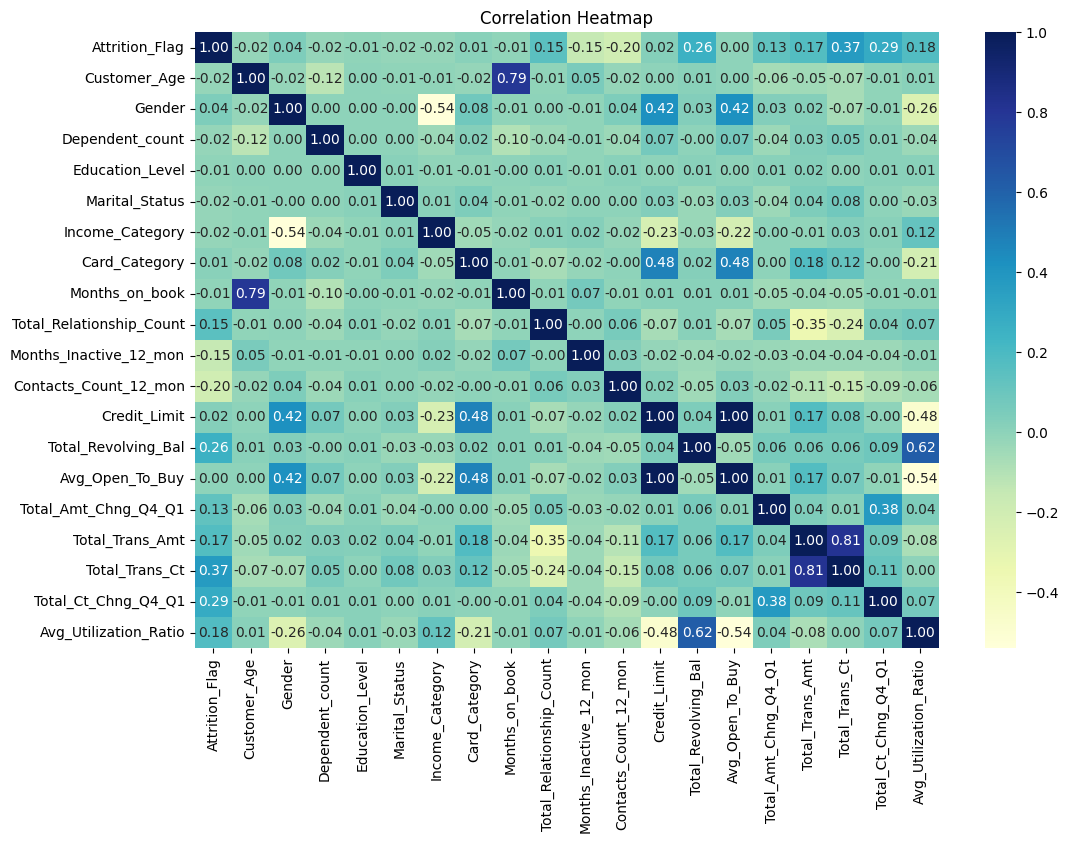

In [165]:
import seaborn as sb
import matplotlib.pyplot as mp

# Calculate correlation matrix
Corr_Matrix = round(data.corr(numeric_only=True), 2)
print(Corr_Matrix)

# Set the figure size before plotting
mp.figure(figsize=(12, 8))  # Width x Height in inches

# Plotting correlation heatmap
dataplot = sb.heatmap(Corr_Matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# Add a title for clarity
mp.title("Correlation Heatmap")

# Displaying the heatmap
mp.show()

In [218]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X = np.array(X)
y = np.array(y)

In [ ]:
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)

In [219]:
X, y

(array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
         6.100e-02],
        [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
         1.050e-01],
        [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
         0.000e+00],
        ...,
        [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
         0.000e+00],
        [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
         0.000e+00],
        [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
         1.890e-01]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [67]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [68]:
# We separate the samples of the different classes
class_one_idx = np.argwhere(y==1)
class_zero_idx = np.argwhere(y==0)

class_one_x = np.squeeze(X[class_one_idx])
class_zero_x = np.squeeze(X[class_zero_idx])

print("Shape of class 0 samples: ", class_zero_x.shape)
print("Shape of class 1 samples: ", class_one_x.shape)

Shape of class 0 samples:  (1627, 19)
Shape of class 1 samples:  (8500, 19)


# resampling

In [69]:
from sklearn.utils import resample

# Upsample minority class
class_zero_upsampled = resample(class_zero_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=8500,    # to match majority class
                                 random_state=123) # reproducible results

print("New shape of class 0 samples: ",class_zero_upsampled.shape)

# Downsample majority class
class_one_downsampled = resample(class_one_x, 
                                 replace=True,     # sample with replacement
                                 n_samples=1627,    # to match minority class
                                 random_state=123) # reproducible results

print("New shape of class 1 samples: ",class_one_downsampled.shape)

New shape of class 0 samples:  (8500, 19)
New shape of class 1 samples:  (1627, 19)


In [70]:
X_balanced = np.concatenate((class_zero_upsampled, class_one_x), axis=0)
print("(Upsampled) Balanced data set shape: ", X_balanced.shape)

X_balanced = np.concatenate((class_one_downsampled, class_zero_x), axis=0)
print("(Downsampled) Balanced data set shape: ", X_balanced.shape)

(Upsampled) Balanced data set shape:  (17000, 19)
(Downsampled) Balanced data set shape:  (3254, 19)


Normalize

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.16540558,  1.05995565,  0.50336813, ..., -0.97389518,
         3.8340026 , -0.77588223],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -1.35734038,
        12.60857291, -0.61627565],
       [ 0.58305837,  1.05995565,  0.50336813, ..., -1.91120566,
         6.80786367, -0.99715499],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ..., -0.20700479,
         0.44430503, -0.99715499],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.12179474,
         0.04106963, -0.99715499],
       [-0.41489356, -0.9434357 , -0.26654715, ..., -0.16439977,
        -0.26555729, -0.31157218]])

                          Attrition_Flag  Customer_Age  Gender  \
Attrition_Flag                      1.00         -0.02    0.04   
Customer_Age                       -0.02          1.00   -0.02   
Gender                              0.04         -0.02    1.00   
Dependent_count                    -0.02         -0.12    0.00   
Education_Level                    -0.01          0.00    0.00   
Marital_Status                     -0.02         -0.01   -0.00   
Income_Category                    -0.02         -0.01   -0.54   
Card_Category                       0.01         -0.02    0.08   
Months_on_book                     -0.01          0.79   -0.01   
Total_Relationship_Count            0.15         -0.01    0.00   
Months_Inactive_12_mon             -0.15          0.05   -0.01   
Contacts_Count_12_mon              -0.20         -0.02    0.04   
Credit_Limit                        0.02          0.00    0.42   
Total_Revolving_Bal                 0.26          0.01    0.03   
Avg_Open_T

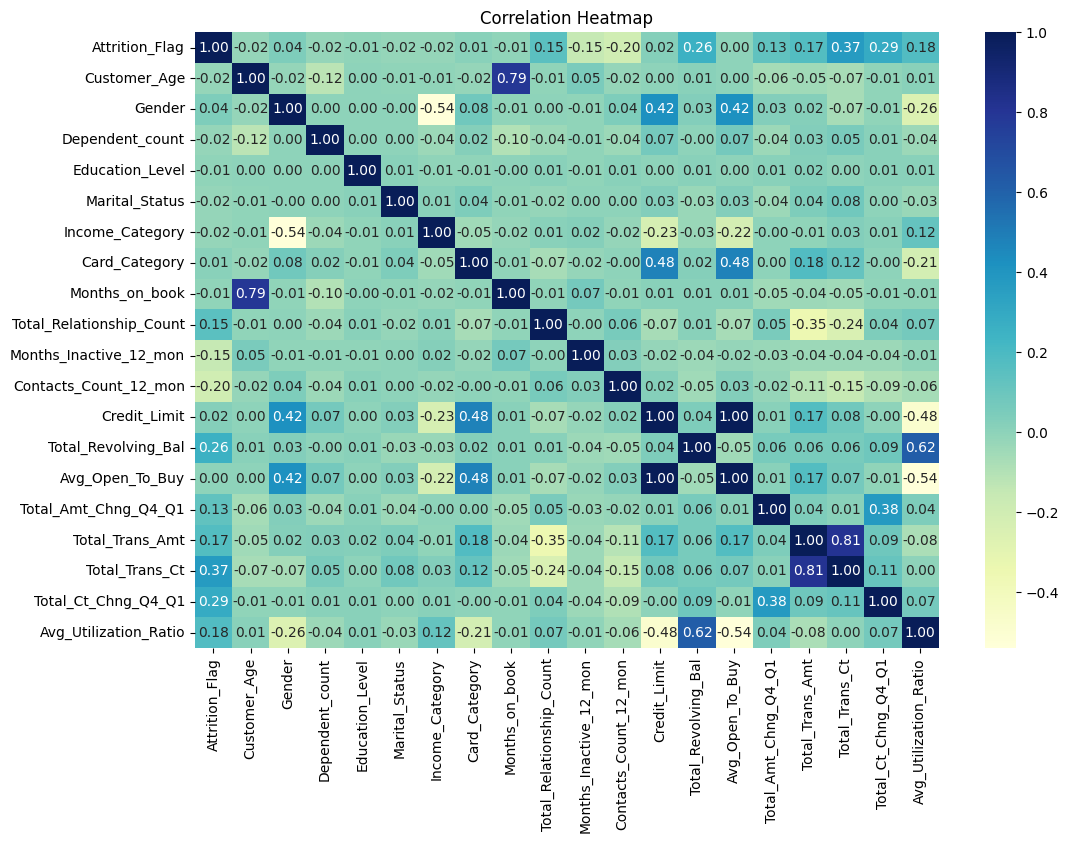

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp

# Calculate correlation matrix
Corr_Matrix = round(data.corr(numeric_only=True), 2)
print(Corr_Matrix)

# Set the figure size before plotting
mp.figure(figsize=(12, 8))  # Width x Height in inches

# Plotting correlation heatmap
dataplot = sb.heatmap(Corr_Matrix, cmap="YlGnBu", annot=True, fmt=".2f")

# Add a title for clarity
mp.title("Correlation Heatmap")

# Displaying the heatmap
mp.show()


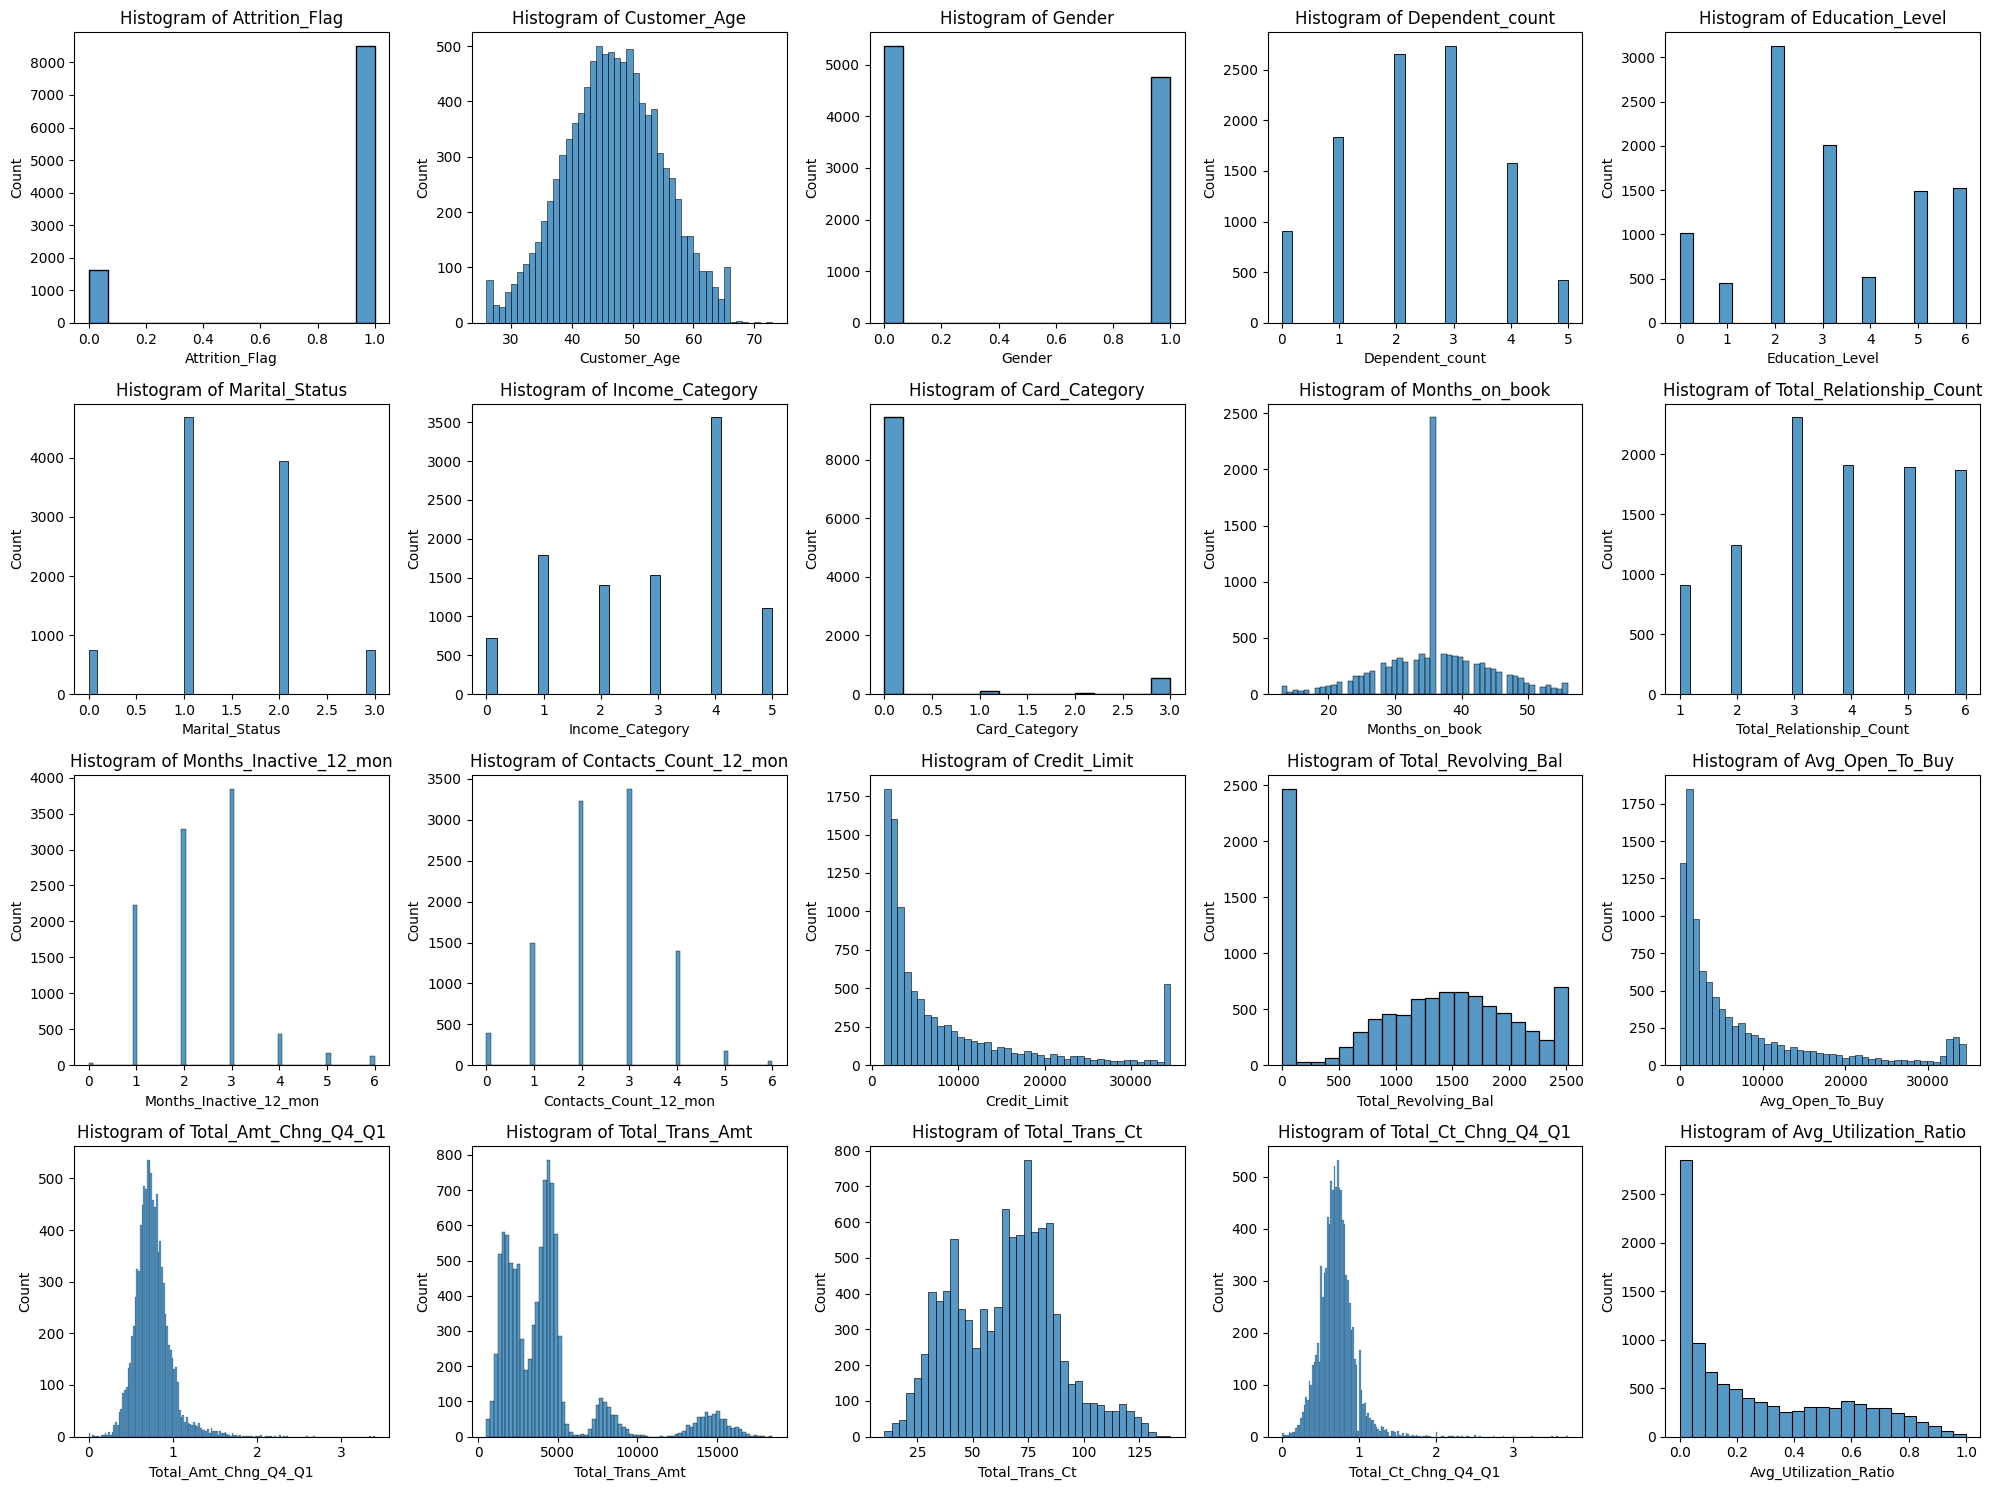

In [179]:
import matplotlib.pyplot as plt
import seaborn as sb

# Number of columns in the dataset
num_columns = len(data.columns)

# Calculate grid size (e.g., 4 rows x 5 columns for 20 plots)
rows = 4  # Adjust based on the number of histograms
cols = 5

# Set the figure size
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust size for clarity

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in a subplot
for i, col in enumerate(data.columns):
    sb.histplot(data[col], ax=axes[i], kde=False)
    axes[i].set_title(f"Histogram of {col}")

# Hide any unused subplots (in case num_columns < rows*cols)
for j in range(num_columns, rows * cols):
    fig.delaxes(axes[j])

# Add spacing for clarity
plt.tight_layout()

# Display all histograms
plt.show()


Highly Correlated Pairs: [('Attrition_Flag', 'Total_Relationship_Count'), ('Attrition_Flag', 'Months_Inactive_12_mon'), ('Attrition_Flag', 'Contacts_Count_12_mon'), ('Attrition_Flag', 'Total_Revolving_Bal'), ('Attrition_Flag', 'Total_Amt_Chng_Q4_Q1'), ('Attrition_Flag', 'Total_Trans_Amt'), ('Attrition_Flag', 'Total_Trans_Ct'), ('Attrition_Flag', 'Total_Ct_Chng_Q4_Q1'), ('Attrition_Flag', 'Avg_Utilization_Ratio'), ('Customer_Age', 'Dependent_count'), ('Customer_Age', 'Months_on_book'), ('Gender', 'Income_Category'), ('Gender', 'Credit_Limit'), ('Gender', 'Avg_Open_To_Buy'), ('Gender', 'Avg_Utilization_Ratio'), ('Dependent_count', 'Months_on_book'), ('Income_Category', 'Credit_Limit'), ('Income_Category', 'Avg_Open_To_Buy'), ('Income_Category', 'Avg_Utilization_Ratio'), ('Card_Category', 'Credit_Limit'), ('Card_Category', 'Avg_Open_To_Buy'), ('Card_Category', 'Total_Trans_Amt'), ('Card_Category', 'Total_Trans_Ct'), ('Card_Category', 'Avg_Utilization_Ratio'), ('Total_Relationship_Count', 

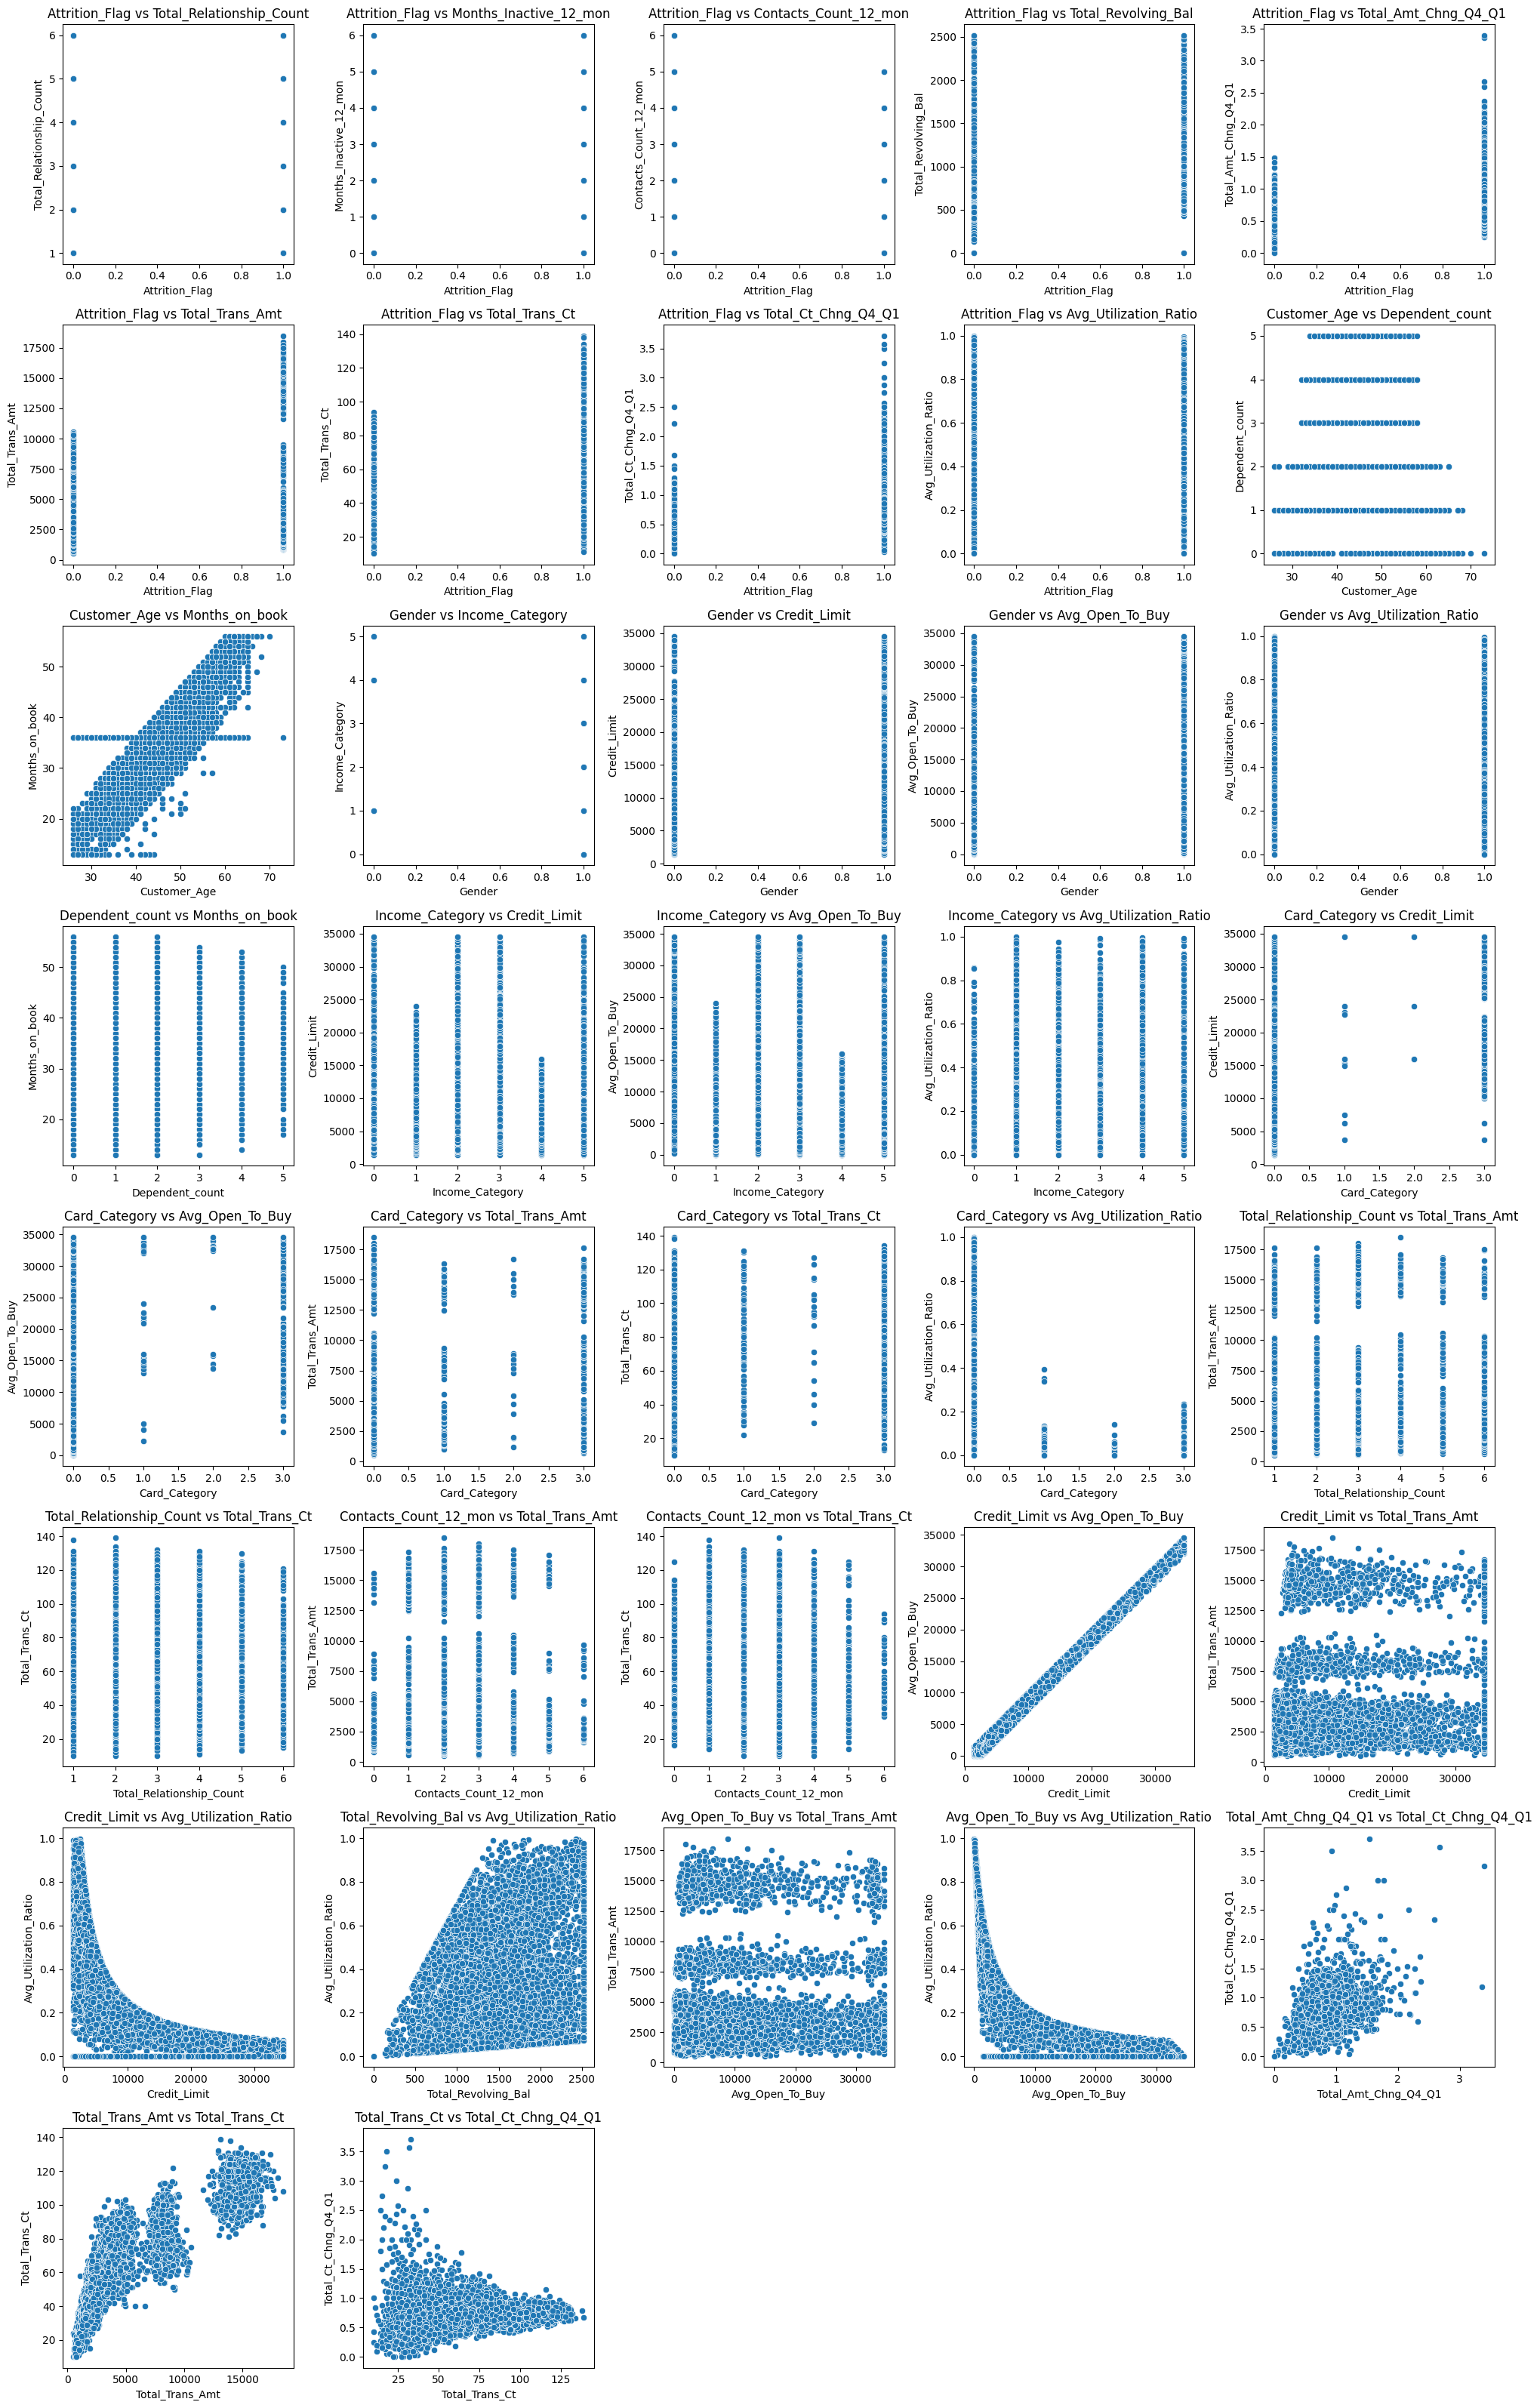

In [195]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Step 2: Find highly correlated column pairs
threshold = 0.1  # Adjust the threshold for correlation
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicates
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2))

print("Highly Correlated Pairs:", high_corr_pairs)

# Step 3: Set up 5 charts per row
num_pairs = len(high_corr_pairs)
cols = 5  # 5 plots per row
rows = max((num_pairs + cols - 1) // cols, 1)  # Calculate the number of rows needed, ensure at least 1 row

# Step 4: Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Adjust figure size for clarity
axes = axes.flatten()  # Flatten axes for easier iteration

# Step 5: Plot scatter plots for highly correlated pairs
for idx, (col1, col2) in enumerate(high_corr_pairs):
    sb.scatterplot(x=data[col1], y=data[col2], ax=axes[idx])
    axes[idx].set_title(f"{col1} vs {col2}")
    axes[idx].set_xlabel(col1)
    axes[idx].set_ylabel(col2)

# Step 6: Hide unused axes
for i in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[i])

# Step 7: Adjust layout and display
plt.tight_layout()
plt.show()

    

# Classification

In [203]:
# spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [204]:
def logistic_regression(X_train, y_train):

    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()
    logistic_regression = model.fit(X_train, y_train)
    return logistic_regression


def random_forest(X_train, y_train):

    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier()
    random_forest = model.fit(X_train, y_train)
    return random_forest

def decision_tree(X_train, y_train):

    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier()
    decision_tree = model.fit(X_train, y_train)
    return decision_tree

def knn(X_train, y_train):

    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier()
    knn = model.fit(X_train, y_train)
    return knn

def svm(X_train, y_train):
    
    from sklearn.svm import SVC

    model = SVC()
    svm = model.fit(X_train, y_train)
    return svm

def naive_bayes(X_train, y_train):

    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    naive_bayes = model.fit(X_train, y_train)
    return naive_bayes

def neural_network(X_train, y_train):

    from sklearn.neural_network import MLPClassifier

    model = MLPClassifier()
    neural_network = model.fit(X_train, y_train)
    return neural_network

logistic_regression = logistic_regression(X_train, y_train)
random_forest = random_forest(X_train, y_train)
decision_tree = decision_tree(X_train, y_train)
knn = knn(X_train, y_train)
svm = svm(X_train, y_train)
naive_bayes = naive_bayes(X_train, y_train)
neural_network = neural_network(X_train, y_train)

model_list = [logistic_regression, random_forest, decision_tree, knn, svm, naive_bayes, neural_network]
#logistic_regression

c:\Users\becod\AI\projects\00-AI\AIvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Train Accuracy: 0.8907542278731021
Test Accuracy: 0.87857847976308


Model: RandomForestClassifier
Train Accuracy: 0.9923466238735958
Test Accuracy: 0.993583415597236


Model: DecisionTreeClassifier
Train Accuracy: 0.9865448710035798
Test Accuracy: 0.9921026653504442


Model: KNeighborsClassifier
Train Accuracy: 0.9149487717565733
Test Accuracy: 0.9210266535044422


Model: SVC
Train Accuracy: 0.8395259844463646
Test Accuracy: 0.8385982230997039


Model: GaussianNB
Train Accuracy: 0.8969263053943958
Test Accuracy: 0.8923988153998026


Model: MLPClassifier
Train Accuracy: 0.8766818911245525
Test Accuracy: 0.868213228035538




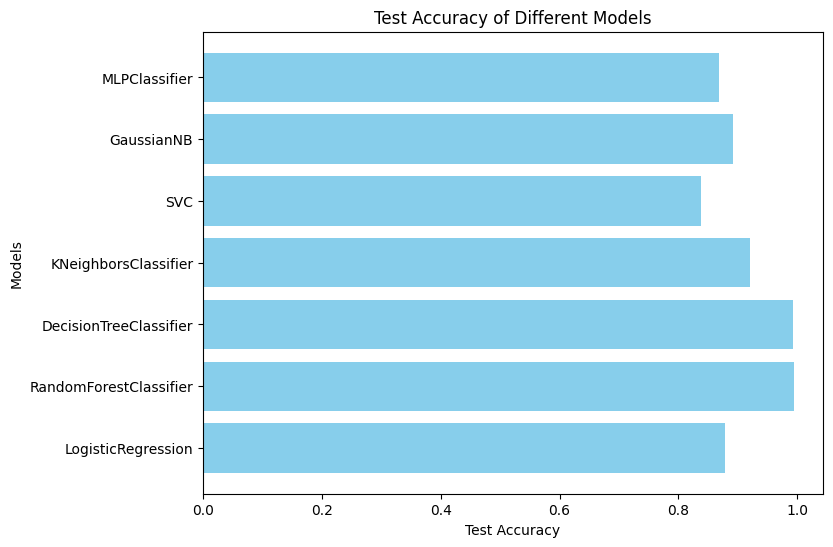

In [253]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

results = []

for i in model_list:

    y_predict_train  = i.predict(X_train)
    y_predict_test = i.predict(X_test)

    confusion_matrix_train = confusion_matrix(y_train, y_predict_train)
    confusion_matrix_test = confusion_matrix(y_test, y_predict_test)

    accuracy_train = accuracy_score(y_train, y_predict_train)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    
    recall_train = recall_score(y_train, y_predict_train)
    recall_test = recall_score(y_test, y_predict_test)

    precision_train = precision_score(y_train, y_predict_train)
    precision_test = precision_score(y_test, y_predict_test)

    # Append results as a list
    results.append([
        i.__class__.__name__,  # Model name
        accuracy_train,        # Train Accuracy
        accuracy_test,         # Test Accuracy
        recall_train,          # Train Recall
        recall_test,           # Test Recall
        precision_train,       # Train Precision
        precision_test         # Test Precision
    ])

    print(f"Model: {i.__class__.__name__}")
    # print(f"Train Confusion Matrix: \n{confusion_matrix_train}")
    # print(f"Test Confusion Matrix: \n{confusion_matrix_test}")
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Test Accuracy: {accuracy_test}")
    # print(f"Train Recall: {recall_train}")
    # print(f"Test Recall: {recall_test}")
    # print(f"Train Precesion: {precision_train}")
    # print(f"Test Precesion: {precision_test}")
    print("\n")


# استخراج دقت‌های تست و نام مدل‌ها
model_names = [result[0] for result in results]  # نام مدل‌ها
test_accuracies = [result[2] for result in results]  # دقت تست مدل‌ها


plt.figure(figsize=(8, 6))
plt.barh(model_names, test_accuracies, color='skyblue')  
plt.xlabel('Test Accuracy')
plt.ylabel('Models')
plt.title('Test Accuracy of Different Models')
plt.show()




In [240]:
display(results)

[['LogisticRegression',
  0.8907542278731021,
  0.87857847976308,
  0.9600058814880165,
  0.9599764567392584,
  0.9141697003640437,
  0.9016030956329464],
 ['RandomForestClassifier',
  0.9923466238735958,
  0.993583415597236,
  0.9973533303925893,
  0.9964685108887581,
  0.9935550021971583,
  0.9958823529411764],
 ['DecisionTreeClassifier',
  0.9865448710035798,
  0.9921026653504442,
  0.9923540655785914,
  0.9952913478516775,
  0.9916250367322951,
  0.9952913478516775],
 ['KNeighborsClassifier',
  0.9149487717565733,
  0.9210266535044422,
  0.964711071901191,
  0.9717480871100648,
  0.9359486447931527,
  0.9364719228587635],
 ['SVC',
  0.8395259844463646,
  0.8385982230997039,
  1.0,
  1.0,
  0.8395259844463646,
  0.8385982230997039],
 ['GaussianNB',
  0.8969263053943958,
  0.8923988153998026,
  0.9439788266431407,
  0.9505591524426134,
  0.9339540296770439,
  0.9233847913093196],
 ['MLPClassifier',
  0.8766818911245525,
  0.868213228035538,
  0.9382443758270842,
  0.9376103590347263,

# dimension reduction

In [208]:
from sklearn.decomposition import PCA

pca = PCA(n_components=(6))
X_pca = pca.fit_transform(X)
X_pca.shape

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

(10127, 6)

# Clustering

In [213]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [214]:
centers = k_means.cluster_centers_
labels = k_means.labels_

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], c='red', marker='x')
plt.show()

K means

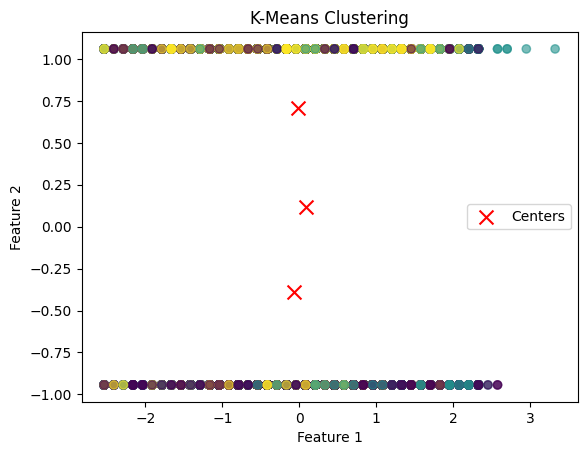

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normaliziation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X_scaled)

centers = k_means.cluster_centers_
labels = k_means.labels_


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

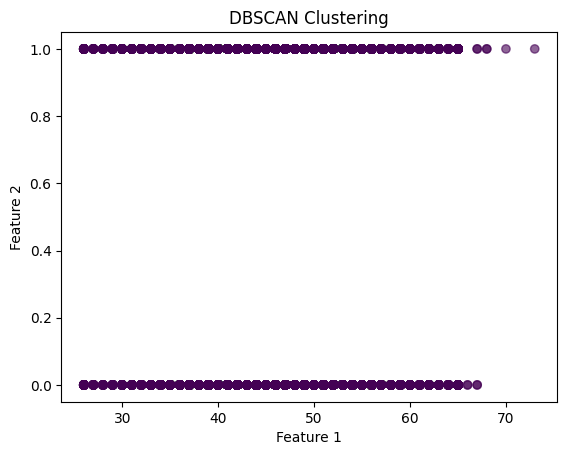

In [226]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# اجرای DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# رسم نمودار خوشه‌بندی
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


HDBSCAN

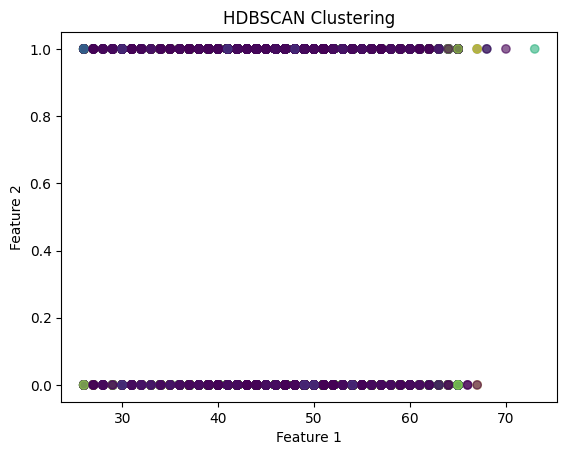

In [228]:
import hdbscan

# اجرای HDBSCAN
clusterer = hdbscan.HDBSCAN()
labels = clusterer.fit_predict(X)

# رسم نمودار
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Optics

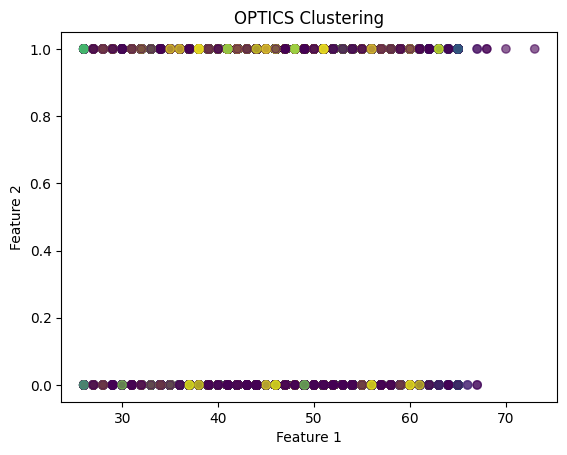

In [227]:
from sklearn.cluster import OPTICS

# اجرای OPTICS
optics = OPTICS(min_samples=5)
labels = optics.fit_predict(X)

# رسم نمودار خوشه‌بندی
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
